# Regresión Lineal

Josué J.
---

la regreesión lineal es de útilidad a las siguientes preguntas: ¿cuál es la relación entre datos futuros y observados? ¿cómo la información de un conjunto de datos nos sirve para

Queremos estudiar la relación entre una variable $y$, llamada variable dependiente y $n$ variables $x_i$, llamadas variables independientes.

## Mínimos cuadrados ordinarios (MCO)

Supongamos que tenemos $n$ observaciones $\{x_i,y_i\}_{i=1}^{n}$ donda $y_i$ es un escalar y $x_i$ es un vector de $p$ parámetros $x_i = (x_{i1},x_{i2},\cdots,x_{ip})^{T}$.

En un modelo de regresión lineal $y_i$ es una función lineal de las variables independientes:

$$ y_i = \theta_1 x_{i1} + \theta_2 x_{i2} + \ldots + \theta_p x_{ip} + \epsilon_i$$

Lo anterior lo podemos represeentar en notación matricial

$$Y = X\Theta + \epsilon,$$
donde
\begin{align}
Y &= \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}; & X &= \begin{pmatrix}
x_1^T \\
x_2^T \\
\vdots \\
x_n^T
\end{pmatrix}; & \Theta &= \begin{pmatrix}
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_p
\end{pmatrix}; & \epsilon &= \begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{pmatrix}.\\
\end{align}

Lo anterior es un sistema de ecuaciones que no necesariamente tiene solución.

El objetivo es encontrar los parámetros $\Theta$ que mejor ajustan al modelo, en el sentido de miminizar el error cuadrático:

$$\hat{\Theta} = \text{arg min}_{\Theta} \sum_{i=1}^{n} \left| y_i - \sum_{j=i}^{p} x_{ij}\theta_{j} \right|^2 = \text{arg min}_{\Theta} \|Y - X\Theta\|^2$$

Comenzamos calculando el gradiente:

\begin{align}
\frac{\partial \|Y - X\Theta\|^2}{\partial \Theta} &= \frac{\partial}{\partial \Theta} (Y - X\Theta)^T (Y - X\Theta)\\
&= \frac{\partial}{\partial \Theta} (Y^T - (X\Theta)^T) (Y - X\Theta)\\
&= \frac{\partial}{\partial \Theta} (Y^T - \Theta^T X^T) (Y - X\Theta)\\
&= \frac{\partial}{\partial \Theta} (Y^T Y - \Theta^T X^T Y - Y^T X \Theta + \Theta^T X^T X \Theta)\\
&= -2 X^T Y + 2X^T X \Theta,
\end{align}
igualando a cero se obtiene que

$$\hat{\Theta} = (X^T X)^{-1} X^T Y$$

Bajo las siguientes suposiciones

- $\epsilon_i \sim N(0,\sigma^2)$, $\sigma^2 < \infty$ para toda i.
- $\text{Cov}(\epsilon_i, \epsilon_j) = 0$, $\forall i \neq j$.

El [Teorema de Gauss-Markov](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) asegura que $\hat{\Theta}$ obtenido mediante mínimos cuadrados ordinarios, es un mínimo local de $\|Y - X\Theta\|^2$.

### Ejemplo:

Encontrar los estimadores de MCO del modelo
$$y_i = \theta_1 + \theta_2 x_{i2} + \theta_3 x_{i3},$$
en este caso, $x_{i1} = 1$, para todo $i$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

In [2]:
n = 100

X = np.stack([np.ones(n), np.random.uniform(0, 10, n), np.random.uniform(10, 100, n)],axis=1) #[1,x2,x3]

Y = 5.0 + 25.0*X[:,1] + 125.0*X[:,2] + np.random.normal(0.0, 1.0, n) #theta_1 = 5, theta_2 = 25, theta_3 = 125

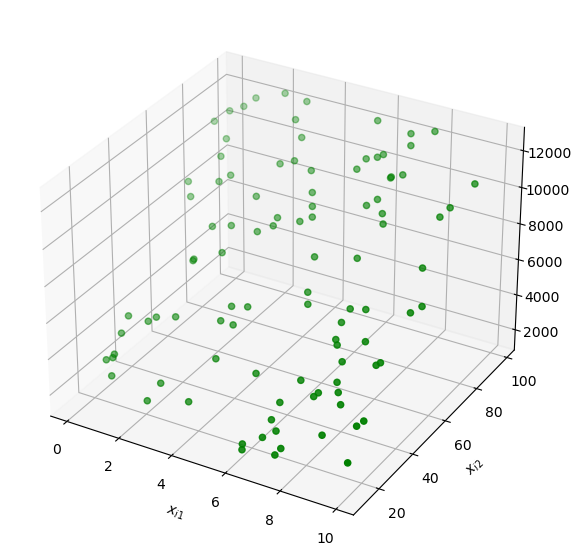

In [3]:
fig = plt.figure(figsize=(11, 7), dpi = 100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], Y, c='g', marker='o')
ax.set_xlabel('$x_{i1}$')
ax.set_ylabel('$x_{i2}$')
plt.show()

In [4]:
HTheta =  ( (np.linalg.inv( (X.transpose()).dot(X) )).dot(X.transpose()) ).dot(Y)
HTheta # los valores theta_i estimados

array([  5.27019196,  24.9729597 , 124.99683384])

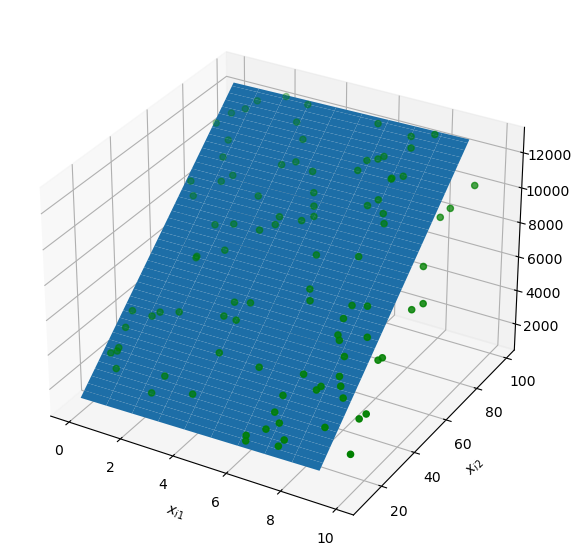

In [5]:
#Graficas de los planos
fig = plt.figure(figsize=(11, 7), dpi = 100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], Y, c='g', marker='o')

X2g = np.arange(0.0, 10.0)
X3g = np.arange(10.0, 100.0)
Xg, Yg = np.meshgrid(X2g, X3g)
Z_em = HTheta[0]+ HTheta[1]*Xg+ HTheta[2]*Yg

ax.plot_surface(Xg,Yg,Z_em)

ax.set_xlabel('$x_{i1}$')
ax.set_ylabel('$x_{i2}$')
plt.show()

Existen varias librerias que realizan MCO en Python:
- [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [statsmodels.regression.linear_model.OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)

### numpy.polyfit

Este método lo que hace es ajustar el polinomio de grado $n$
$$p(x) = p_0 x^n + p_1 x^{n-1} + \ldots + p_n$$
minimizando el error cuadrático
$$E = \sum_{j=0}^{k} |p(x_j) - y_j |^2.$$

Entonces con este método podemos realizar regresión lineal en el modelo
$$y_i = \theta_1 + \theta_2 x_{i2} + \epsilon_i,$$

In [6]:
Y1 = 5.0 + 3.0*X[:,1] + np.random.normal(0.0, 1.0, n)

npTheta = np.polyfit(X[:,1], Y1, 1)

In [7]:
npTheta

array([3.0161907 , 4.92690822])

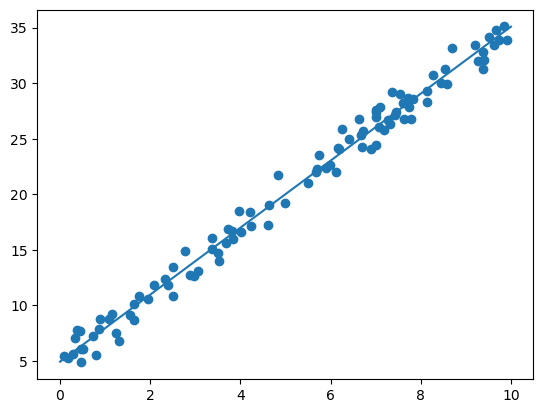

In [8]:
plt.scatter(X[:,1],Y1)
plt.plot(np.linspace(0,10), npTheta[1] + npTheta[0]*np.linspace(0,10))
plt.show()

### sklearn.linear_model.LinearRegression

In [9]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
iris_X, iris_y = datasets.load_iris(return_X_y=True)

Text(0, 0.5, 'sepal width cm')

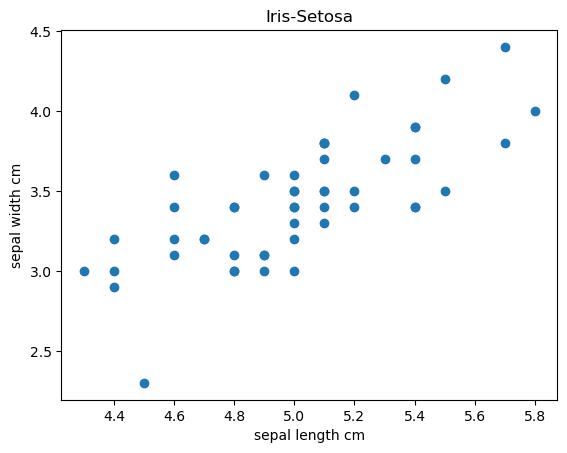

In [11]:
plt.scatter(iris_X[0:50,0],iris_X[0:50,1])
plt.title("Iris-Setosa")
plt.xlabel('sepal length cm')
plt.ylabel('sepal width cm')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris_X[0:50,0], iris_X[0:50,1], test_size=0.33)

In [13]:
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [14]:
iris_y_pred = regr.predict(X_test.reshape(-1, 1))

print("Coeficientes: \n", regr.coef_)

print("Intercepto: \n", regr.intercept_)

print("Mean squared error: %.2f" % mean_squared_error(y_test, iris_y_pred))

print("Coefficient of determination: %.2f" % r2_score(y_test, iris_y_pred))

Coeficientes: 
 [0.93126685]
Intercepto: 
 -1.2175651392632498
Mean squared error: 0.05
Coefficient of determination: 0.21


donde el coeficiente de determinación se calcula como
$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}}, $$
con
$$ SS_{res} = \sum_i (y_i - f_i)^2, $$
$$ SS_{tot} = \sum_i (y_i - \bar{y})^2,$$
$$ \bar{y} = \frac{1}{n} \sum_{i}^{n} y_i; $$

donde $f_i$ es el valor predicho. El coeficiente $R^2$ es una medida de que tan bien un modelo de regresión predice respecto a los verdaderos datos.

Por otro lado, el error cuadratico medio es

$$MSE = \frac{1}{n} \sum_i (y_i - f_i)^2$$

### statsmodels.regression.linear_model.OLS

In [15]:
import statsmodels.api as sm

In [16]:
X = sm.add_constant(X_train) #considerar un untercepto
modelo = sm.OLS(y_train,X)
results = modelo.fit()

In [17]:
results.params

array([-1.21756514,  0.93126685])

In [18]:
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.585   
Dependent Variable: y                AIC:                10.5964 
Date:               2023-11-12 16:38 BIC:                13.5894 
No. Observations:   33               Log-Likelihood:     -3.2982 
Df Model:           1                F-statistic:        46.11   
Df Residuals:       31               Prob (F-statistic): 1.32e-07
R-squared:          0.598            Scale:              0.076118
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const      -1.2176     0.6861   -1.7745   0.0858   -2.6169   0.1818
x1          0.9313     0.1371    6.7906   0.0000    0.6516   1.2110
-----------------------------------------------------------------
Omnibus:               0.382        Durbin-Watson:          1.822
Prob(Omnibus):   

Como se puede observar, regresa más información.

Por ejemplo, el estadístico $F$ que informa es para la prueba de hipótesis:

- $H_0 : \mathbb{E}(Y \,|\, X=x) = b,$
- $H_1 : \mathbb{E}(Y \,|\, X=x) = b + ax.$

Es decir, una manera de cuantificar quee tan relevante es el término $a$ en el modelo de regresión.

Bajo la hipotesis de los MCO, el estadístico
$$F = \frac{SS_{tot} - SS_{res}}{\hat{\sigma}^2},$$
tiene una distribución $F \sim F(1,n-2)$.
La probabilidad reportada, representa la probabilidad de $F$ exceder su valor calculado si la hipotesis $H_0$ fuera cierta.

Tambien proporciona el coeficiente $R^2$ Ajustado:
$$\text{Adjusted } R^2 = 1 - \frac{SS_{res}/(n-p)}{SS_{tot}/(n-1)};$$
donde $p$ es el número de parámetros ajustados. Es un mejor cuantificador de la bondad del modelo cuando se intenta ajustar muchos parámetros con una pequeño número de datos $n$.